In [1]:
# Copyright 2021 Google
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Time Crystal Data Analysis

This notebook acts as a script to plot Figures 2d through 3d in the paper: Observation of Time-Crystalline Eigenstate Order on a Quantum Processor ([Nature](https://www.nature.com/articles/s41586-021-04257-w)). It uses the data collected and saved by the notebook [Time Crystal Data Collection](time_crystal_data_collection.ipynb). 

Each of the five figures serve to exemplify the time-crystalline nature of the Many Body Local Discrete Time Crystal system being emulated by the experiment's circuit. This occurs as consistent and stable oscillation in spite of variances in `local_fields` and `initial_state`.

## Setup

In [ ]:
!pip install cirq --pre --quiet
try:
    import recirq
except ImportError:
    !pip install --quiet git+https://github.com/quantumlib/ReCirq

In [3]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
import recirq.time_crystals as time_crystals

In [4]:
# directory to pull data from
base_dir = time_crystals.DEFAULT_BASE_DIR

## Figure 2d
Figure 2d demonstrates polarizations over time ($U$-cycles), comparing different values of the constant `g`.

Two datasets were generated with values of `g` as $0.6$ and $0.94$. Each of which are of shape `(num_cycles + 1, num_qubits)`. Plot each matrix as an image, on the same color scale. 

At $g = 0.6$, every qubit quickly loses polarization and the measurements for each qubit after the first couple cycles is close to completely random. This case matches the expectation of rapid decay to maximum entropy for systems that are not many-body local. 

At $g = 0.94$, every qubit's polarization is nearly maximal and switches consistently, every two cycles, revealing the oscillation typical to an MBL-DTC system. There is slight variance, indicated by the streaks of green (0.75) visible among the yellow (1.0), but this variance doesn't interfere with or prevent the stability of the oscillations. At this value, the oscillations are mostly unaffected by any introduced randomness.


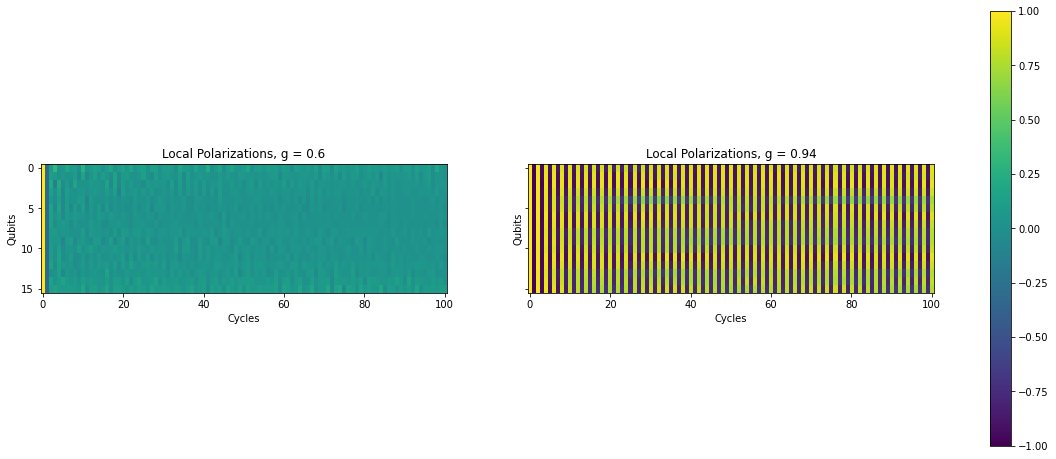

In [5]:
# retrieve data
filename = f'{base_dir}/2d.json'
average_polarizations = cirq.read_json(filename)

# prepare subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharey=True, sharex=True)

# prepare labels
g_labels = ['0.6', '0.94']

for g, axis, polarizations in zip(g_labels, axes, average_polarizations):

    # switch axes
    polarizations = np.asarray(polarizations).transpose()
    
    # plot polarizations as an image
    artist = axis.imshow(polarizations, aspect = 2.0, vmin=-1.0, vmax=1.0)

    # add labels and colorbar and title
    axis.set_xlabel('Cycles')
    axis.set_ylabel('Qubits')
    axis.set_title('Local Polarizations, g = ' + str(g))
    
# add colorbar
fig.colorbar(artist, ax=axes.ravel().tolist())

## Figure 3a
Figure 3a demonstrates the interaction between `phis` and `initial_state`, when each are random or fixed. 

Six datasets were generated with random and fixed of `phis`, and with one of three different `initial_state`s, autocorrelated, and averaged over all qubit sites. The figure plots each configuration's polarizations over time (cycles). 

With a randomly generated, disordered `phi`, all initial states maintain relatively maximal average polarization values, which oscillate with a period of two cycles. After the first ten cycles, the polarizations are stable around about $\pm 0.75$. 

With a fixed phi of $-0.4$, the same behavior is observed for the polarized (all zeros) and disturbed polarized (all zeros except index 11) initial states. However, the random initial state's average polarizations continue to decay until around cycle 20, after which they remains around $\pm 0.25$. In this case, the oscillation is maintained, but is much less well defined. In a real system with noise and decoherence, the oscillation decays and disappears much more quickly than in the other initial_states' cases, as shown in the [paper](https://www.nature.com/articles/s41586-021-04257-w). 

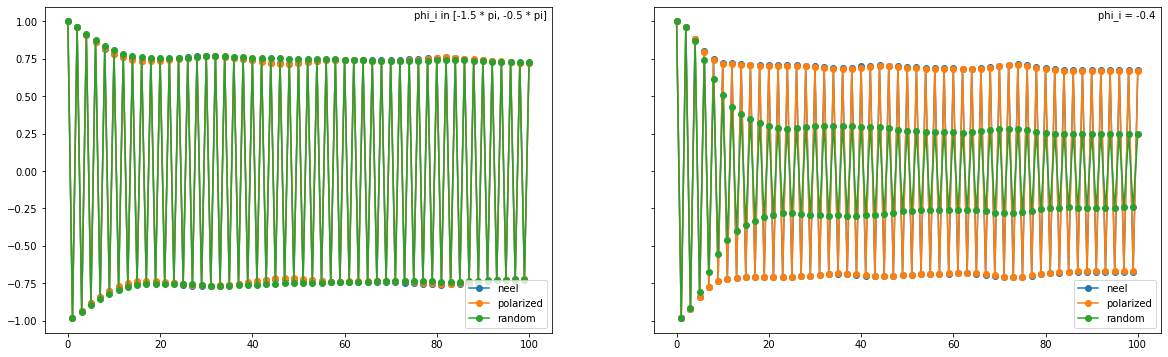

In [6]:
# retrieve data
filename = f'{base_dir}/3a.json'
average_polarizations = cirq.read_json(filename)

# prepare subplots
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20, 6))

# prepare labels
phi_labels = ['phi_i in [-1.5 * pi, -0.5 * pi]', 'phi_i = -0.4']
initial_state_labels = ['neel', 'polarized', 'random']

# plot and label
for axis, cycles_by_initial_state in zip(axes, average_polarizations):
    for initial_state_label, cycles in zip(initial_state_labels, cycles_by_initial_state):
        axis.plot(cycles, marker='o', label=initial_state_label)

# add phi labels and legend to each subplot
for phi_label, axis in zip(phi_labels, axes): 
    axis.text(0.99, 0.99, phi_label, horizontalalignment='right', verticalalignment='top', transform=axis.transAxes)
    axis.legend(loc='lower right')


## Figure 3b
Figure 3b reinforces the observation of Figure 3a, comparing fixed and random `phis` over many different random `initial_state`s. 

$40$ datasets were generated as the product of $20$ initial states and two (fixed and random) options for phis. The figure plots a histogram of the **absolute value of** the polarizations, averaged over all qubits and over cycles $30$ and $31$. 

As noted in Figure 3a, the oscillations have likely stabilized by cycles $30$ and $31$. The average absolute value polarizations for the random phis is consistently high, around $0.75$. For the fixed phis, they are consistently lower, most likely to be around $0.45$. This confirms that the behavior observed in Figure 3a is also present over many different random initial states, which indicates that randomness in the phis parameter improves the strength of the oscillations. 

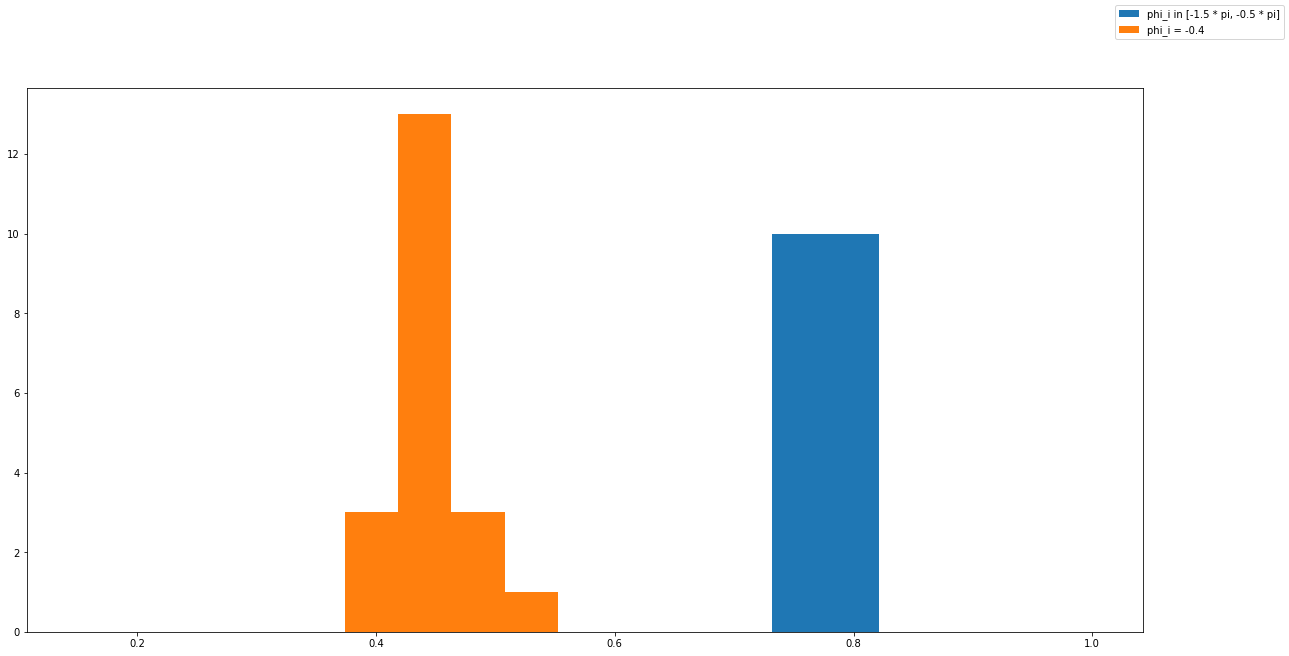

In [7]:
# retrieve data
filename = f'{base_dir}/3b.json'
average_polarizations = cirq.read_json(filename)

# prepare subplots
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

# prepare labels
phi_labels = ['phi_i in [-1.5 * pi, -0.5 * pi]', 'phi_i = -0.4']

# plot in histograms
for phi_label, average_polarizations in zip(phi_labels, average_polarizations):
    axis.hist(average_polarizations, label=phi_label, bins=np.linspace(0.15, 1.0, 20))
    
# add legend and show
fig.legend()

## Figure 3c
Figure 3c analyzes the effect of a disturbed `initial_state`'s interaction with `phi`. 

Four datasets, the product of two phi options (random and fixed) and two initial state options (polarized and polarized but disturbed at qubit 11) are plotted separately for cycles $30$ through $60$ and qubits $11$ through $14$. 

For the random phis, the disturbed initial state, by cycle $30$, seems not to have interfered the with the oscillations' strength. For both the disturbed qubit, $11$, and its neighboring qubits, the oscillations have maintained high polarity. 

For the fixed phis, the disturbed initial state polarizations have deteriorated significantly by cycle $30$, relative to those of the polarized state, and stay poorly polarized through to cycle $60$. This reflects the observations in Figures 3a and 3b. The nearby qubits, $12$ through $14$, also show deterioration, but meaningfully less. The nearby qubits seem to be interfered with by the adjacent disturbed qubit, but this interference loses its influence with distance. 

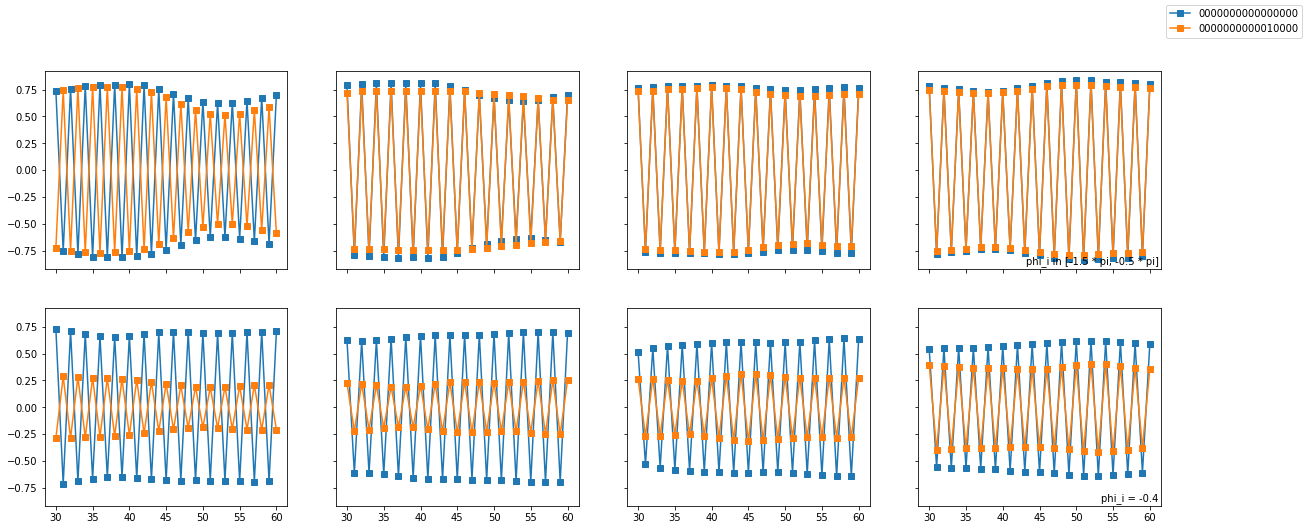

In [8]:
# retrieve data
filename = f'{base_dir}/3c.json'
average_polarizations = cirq.read_json(filename)

# prepare initial qubits as legend label strings
num_qubits = 16
disturb_qubit = 11
polarized_initial_state = [0]*num_qubits
disturbed_polarized_initial_state = list(polarized_initial_state)
disturbed_polarized_initial_state[disturb_qubit] = 1
initial_states = [''.join(map(str,polarized_initial_state)), ''.join(map(str,disturbed_polarized_initial_state))]

# prepare subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,8), sharey=True, sharex=True)

# plot according to phi and qubit options
for phi_axes, data_by_initial_state in zip(axes, average_polarizations): 
    for initial_state, data in zip(initial_states, data_by_initial_state):
        for qubit_index, axis in enumerate(phi_axes):
            # consider only qubit index subset, swap indices, and plot
            points = np.asarray(data)[:, qubit_index]
            axis.plot(range(30, 61, 1), points, marker='s', label=initial_state)

# prepare labels
phi_labels = ['phi_i in [-1.5 * pi, -0.5 * pi]', 'phi_i = -0.4']

# add phi labels
for phi_label, axis in zip(phi_labels, [axes[0][3], axes[1][3]]): 
    fig.text(0.99, 0.01, phi_label, horizontalalignment='right', verticalalignment='bottom', transform=axis.transAxes)

# add legend
handles, labels = axis.get_legend_handles_labels()
labels_dict = dict(zip(labels, handles))
fig.legend(labels_dict.values(), labels_dict.keys())

## Figure 3d.a
Figure 3d.a again compares random and fixed phis, this time for the signal ratio between the polarized and disturbed polarized initial states. 

Four datasets, the product of two phi options (random and fixed) for two initial state options (polarized and disturbed-at-qubit-11 polarized) are plotted in two images, one for each phi option. Each image is the signal ratio between the data for the polarized and disturbed polarized states, defined as: 
$$\zeta = \frac{|\zeta_1 - \zeta_2|}{|\zeta_1| + |\zeta_2|}$$

This serves to demonstrate the influence of the disturbed qubit on its own and its neighbors' polarization strengths. 

For the random phis, the disturbed qubit's polarizations maintain strength and is consistently distinct and inverted relative to the the polarizations of the remaining zero-initialized qubits. For the fixed phis, the signal ratio of the disturbed qubits seems to leak out and influence the neighboring qubits, eventually diffusing to affect the polarization ratio of almost every qubit. This fixed phis case is much less capable of consistently maintaining the expected polarizations, relative to the random phis case. With randomness in the phis, the system is able to maintain it's distinct oscillatory behavior much more consistently. 

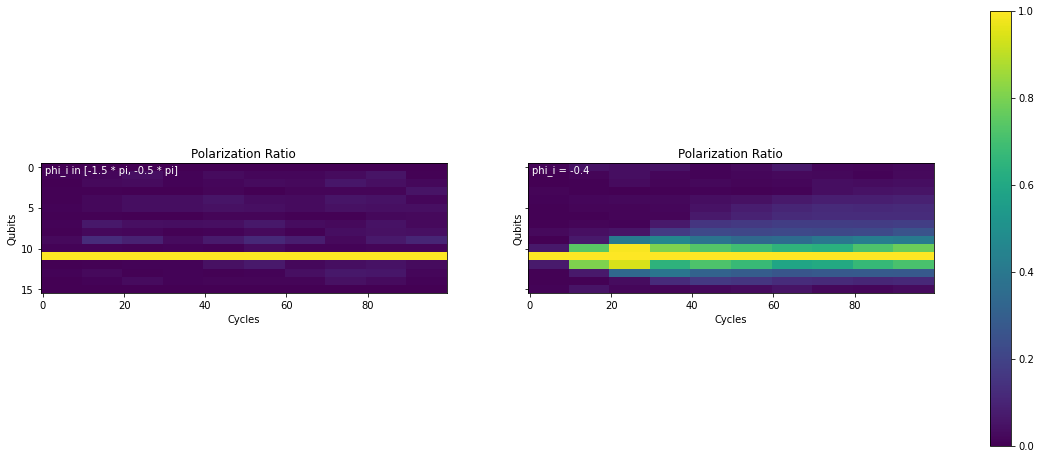

In [9]:
# retrieve data
filename = f'{base_dir}/3d.json'
average_polarizations = np.asarray(cirq.read_json(filename))

# number of cycles used in generation
num_cycles = 100

# the size of window to average cycles over
cycle_window = 10

# prepare subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharey=True, sharex=True)

# plot according to phi option
for average_polarizations_for_phi, axis in zip(average_polarizations, axes):

    # compare the two polarization signals with signal_ratio
    polarization_ratio = time_crystals.signal_ratio(*average_polarizations_for_phi)

    # define window indices
    subdivisions = np.arange(cycle_window, num_cycles + 1, cycle_window)

    # divide into cycles_window width sections and discard a final window that isn't full size
    polarization_ratio_windows = np.split(polarization_ratio, subdivisions, axis=0)
    if not polarization_ratio_windows[0].shape == polarization_ratio_windows[-1].shape: 
        polarization_ratio_windows = polarization_ratio_windows[:-1]
    
    # stack windows into a new axis
    polarization_ratio_by_windows = np.stack(polarization_ratio_windows, axis=0)
    
    # average over cycle windows
    average_polarization_ratio_by_windows = np.mean(polarization_ratio_by_windows, axis=1)

    # repeat along the cycles axis, to return to original shape
    average_polarization_ratio = np.repeat(average_polarization_ratio_by_windows, cycle_window, axis=0)

    # plot polarizations as an image
    artist = axis.imshow(average_polarization_ratio.transpose(), aspect = 2.0, vmin=0, vmax=1.0)

    # add labels and colorbar and title
    axis.set_xlabel('Cycles')
    axis.set_ylabel('Qubits')
    axis.set_title('Polarization Ratio')
    
# add colorbar
fig.colorbar(artist, ax=axes.ravel().tolist())

# set phi labels
phi_labels = ['phi_i in [-1.5 * pi, -0.5 * pi]', 'phi_i = -0.4']

# add phi labels
for phi_label, axis in zip(phi_labels, axes): 
    fig.text(0.01, 0.99, phi_label, horizontalalignment='left', verticalalignment='top', transform=axis.transAxes, color='white')


## Figure 3d.b
Figure 3d.b is a vertical slice of Figure 3d.a, over a limited number of cycles. 

The signal ratio, averaged over cycles $51$ through $60$ is plotted for each qubit. 

While the disturbed qubit $11$ maintains a high signal ratio in both cases, the neighboring qubits in the random phis case are not significantly affected. In the fixed phis case, the other qubits have higher signal ratio the closer they are to the disturbed qubit. This reflects the results seen in Figure 3d.a, again indicating that randomness in phis helps the system oscillate consistently. 

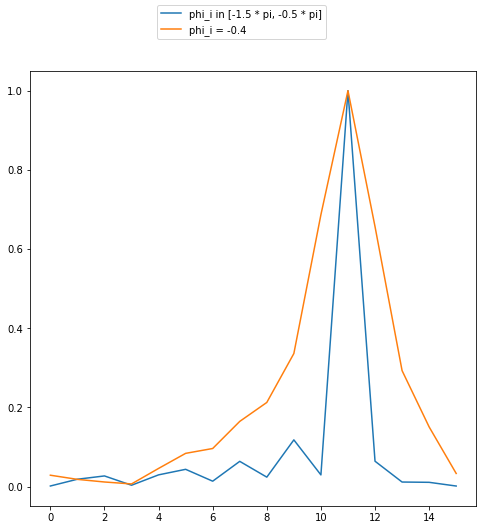

In [10]:
# prepare subplots
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

# plot according to phi option
for polarizations, phi_label in zip(average_polarizations, phi_labels):

    # compare the two polarization signals with signal_ratio
    polarization_ratio = time_crystals.signal_ratio(*polarizations)

    # only consider one window's worth of cycles
    restricted_polarization_ratio = polarization_ratio[51:61, :]

    # average over cycles
    average_polarization_ratio = np.mean(restricted_polarization_ratio, axis=0)
    
    # plot line
    axis.plot(average_polarization_ratio, label=phi_label)

# add legend
fig.legend(loc='upper center')

## Further Reading
For more detail and analysis on these experiments, including their results on actual hardware, refer back to the original paper: Observation of Time-Crystalline Eigenstate Order on a Quantum Processor ([Nature](https://www.nature.com/articles/s41586-021-04257-w)). Also provided in the paper are many other experiments and figures which are uniquely informative when run in a noisy quantum hardware environment